In [849]:
#importing libraries and modules that are necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [921]:
#reading data from the csv files
countrydata=pd.read_csv("Country-data.csv",encoding='iso-8859-1',header=0,sep=',' )
countrydata['ID'] = 100+data_test.index
countrydata.head()
count2=countrydata

The algorithm needs to find data points whose values are similar to each other and therefore these points would then belong to the same cluster. The method in which any clustering algorithm goes about doing that is through the method of finding something called a “distance measure”. The distance measure that is used in K-means clustering is called the Euclidean Distance measure.


### 2.Clean the DATA

In [851]:
#scan the data for any abnormalities and clean the data
#check for null values
print(countrydata.isnull().sum())
#reading the shape of the dataframe
print(countrydata.shape)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
dtype: int64
(167, 11)


In [852]:
countrydata=countrydata.dropna(axis=0,how="all")
countrydata=countrydata.dropna(axis=1,how="all")
print(countrydata)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp   ID  
0         9.44        56.2       5.82    553  100  
1      

In [853]:
#check for any duplicate columns and rows and drop the duplicates
duplicate_rows_df = countrydata[countrydata.duplicated()]
print ("number of duplicate rows: ",duplicate_rows_df.shape)
countrydata.drop_duplicates()
countrydata.drop_duplicates().shape

number of duplicate rows:  (0, 11)


(167, 11)

In [854]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 11 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
ID            167 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 15.7+ KB


###3.Data Preparation


R: Recency 
F:Frequencey
E

In [855]:
#checkforoutliers
countrydata.columns
countrydata.country.values



array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [856]:

colnames = list(countrydata.columns)
colnames

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp',
 'ID']

In [857]:

y= countrydata.pop("country")

In [858]:
scaler=StandardScaler()

In [859]:
X=countrydata.copy()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,262
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,263
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,264
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,265


In [864]:
x=scaler.fit_transform (X)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  1.90288227,
        -0.67917961, -1.72171011],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.85997281,
        -0.48562324, -1.70096662],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.0384044 ,
        -0.46537561, -1.68022312],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.66120626,
        -0.63775406,  1.68022312],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.14094382,
        -0.63775406,  1.70096662],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  1.6246091 ,
        -0.62954556,  1.72171011]])

In [865]:
countrydata2=pd.DataFrame(x,columns=X.columns.values)
df3=countrydata2.T
df3

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
child_mort,1.291532,-0.538949,-0.272833,2.007808,-0.695634,-0.591177,-0.501643,-0.832423,-0.844858,0.023128,...,-0.737914,-0.822475,-0.770246,-0.688173,-0.048997,-0.225578,-0.526514,-0.372315,0.448417,1.114951
exports,-1.138280,-0.479658,-0.099122,0.775381,0.160668,-0.812628,-0.743107,-0.779697,0.372890,0.482661,...,1.338868,-0.472340,-1.050464,-0.541862,-0.344275,0.200917,-0.461363,1.130305,-0.406478,-0.150348
health,0.279088,-0.097016,-0.966073,-1.448071,-0.286894,0.468966,-0.882089,0.699011,1.527901,-0.341667,...,-1.152299,1.031297,4.047436,0.560254,-0.367227,-0.571711,-0.695862,0.008877,-0.597272,-0.338015
imports,-0.082455,0.070837,-0.641762,-0.165315,0.497568,-1.279787,-0.065883,-1.076779,0.037693,-1.085065,...,0.692289,-0.666620,-1.288073,-0.890343,-0.761910,0.240700,-1.213499,1.380030,-0.517472,-0.662477
income,-0.808245,-0.375369,-0.220844,-0.585043,0.101732,0.080920,-0.543421,1.261966,1.355617,-0.059556,...,2.104826,0.991418,1.678193,-0.002325,-0.671411,-0.738527,-0.033542,-0.658404,-0.658924,-0.721358
inflation,0.157336,-0.312347,0.789274,1.387054,-0.601749,1.244725,-0.001123,-0.628316,-0.655549,0.571037,...,0.447686,-0.589413,-0.622623,-0.272496,0.827229,-0.489784,3.616865,0.409732,1.500916,0.590015
life_expec,-1.619092,0.647866,0.670423,-1.179234,0.704258,0.591474,0.309514,1.290735,1.121559,-0.164178,...,0.670423,1.099002,0.918548,0.659145,-0.198014,-0.852161,0.546361,0.286958,-0.344633,-2.092785
total_fer,1.902882,-0.859973,-0.038404,2.128151,-0.541946,-0.382933,-0.833471,-0.674457,-0.999109,-0.681083,...,-0.714211,-0.681083,-0.674457,-0.575074,-0.402810,0.365754,-0.316678,-0.661206,1.140944,1.624609
gdpp,-0.679180,-0.485623,-0.465376,-0.516268,-0.041817,-0.145791,-0.533233,2.130699,1.857082,-0.389857,...,1.205874,1.419295,1.939167,-0.058234,-0.633923,-0.546913,0.029323,-0.637754,-0.637754,-0.629546
ID,-1.721710,-1.700967,-1.680223,-1.659480,-1.638736,-1.617993,-1.597249,-1.576506,-1.555762,-1.535019,...,1.535019,1.555762,1.576506,1.597249,1.617993,1.638736,1.659480,1.680223,1.700967,1.721710


Applying PCA on the data

In [866]:
from sklearn.decomposition import PCA

In [867]:
pca=PCA(random_state=42)

In [868]:
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [869]:
pca.components_


array([[ 0.11129827, -0.03072624,  0.00232968, ..., -0.01203243,
         0.0800688 ,  0.1173687 ],
       [-0.00170797,  0.00470883, -0.00966051, ...,  0.08798655,
        -0.03820442, -0.00289222],
       [ 0.07673468,  0.01553369, -0.08694487, ..., -0.01489079,
        -0.0831051 , -0.01438614],
       ...,
       [-0.10714256, -0.05488532,  0.01452547, ...,  0.04330327,
        -0.01532792,  0.09162198],
       [ 0.06511845,  0.02804732,  0.00232024, ..., -0.05311178,
        -0.03173437, -0.01755605],
       [-0.68239794,  0.40105608, -0.01907217, ..., -0.07939151,
         0.01313024, -0.01645251]])

In [870]:
pca.explained_variance_ratio_

array([4.42205265e-01, 1.63155074e-01, 1.31287441e-01, 1.11757670e-01,
       7.50256402e-02, 4.02530038e-02, 1.52732665e-02, 1.27338502e-02,
       8.30878921e-03, 1.77748740e-32])

In [871]:
import matplotlib


<BarContainer object of 10 artists>

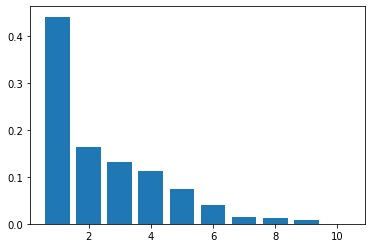

In [872]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [873]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)

In [874]:
###Making Scree Plot

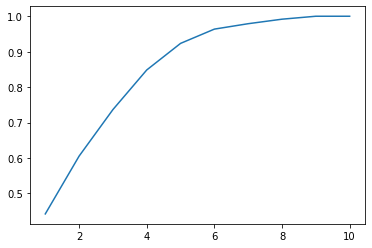

In [875]:

plt.plot(range(1,len(var_cumu)+1),var_cumu)

In [876]:
####DImensionality Reduction

In [877]:
pc4=PCA(n_components=2,random_state=42)

In [878]:
pc4

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [879]:
newdata=pc4.fit_transform(df3)

In [880]:
newdata.shape

(10, 2)

In [881]:
rownames = y
df=pd.DataFrame(newdata,columns=["PC1","PC2"])




In [882]:

#Let's try and check the first three components now

df1=pd.DataFrame({'Features':colnames})
pcs_df = pd.concat([df,df1],axis=1)
pcs_df

,PC1,PC2,Features
0,13.156690,0.564797,country
1,-4.917844,8.476024,child_mort
2,-2.068066,-5.455902,exports
3,-1.798456,10.063126,health
4,-8.267248,-1.769469,imports
5,7.295194,-3.372567,income
6,-9.814403,-3.369387,inflation
7,12.824044,-0.311377,life_expec
8,-8.071287,-3.080746,total_fer
9,1.661377,-1.744499,gdpp


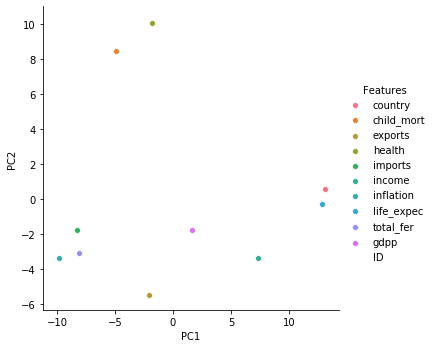

In [883]:
sns.pairplot(data=pcs_df,x_vars="PC1",y_vars="PC2",hue="Features",size=5)
plt.savefig("ab")

In [884]:
#checking for outliers
num_countrydata=countrydata[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [885]:
num_countrydata.describe(percentiles=[0.25,0.5,0.75,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [886]:
features=countrydata.columns
list(enumerate(features))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp'),
 (9, 'ID')]

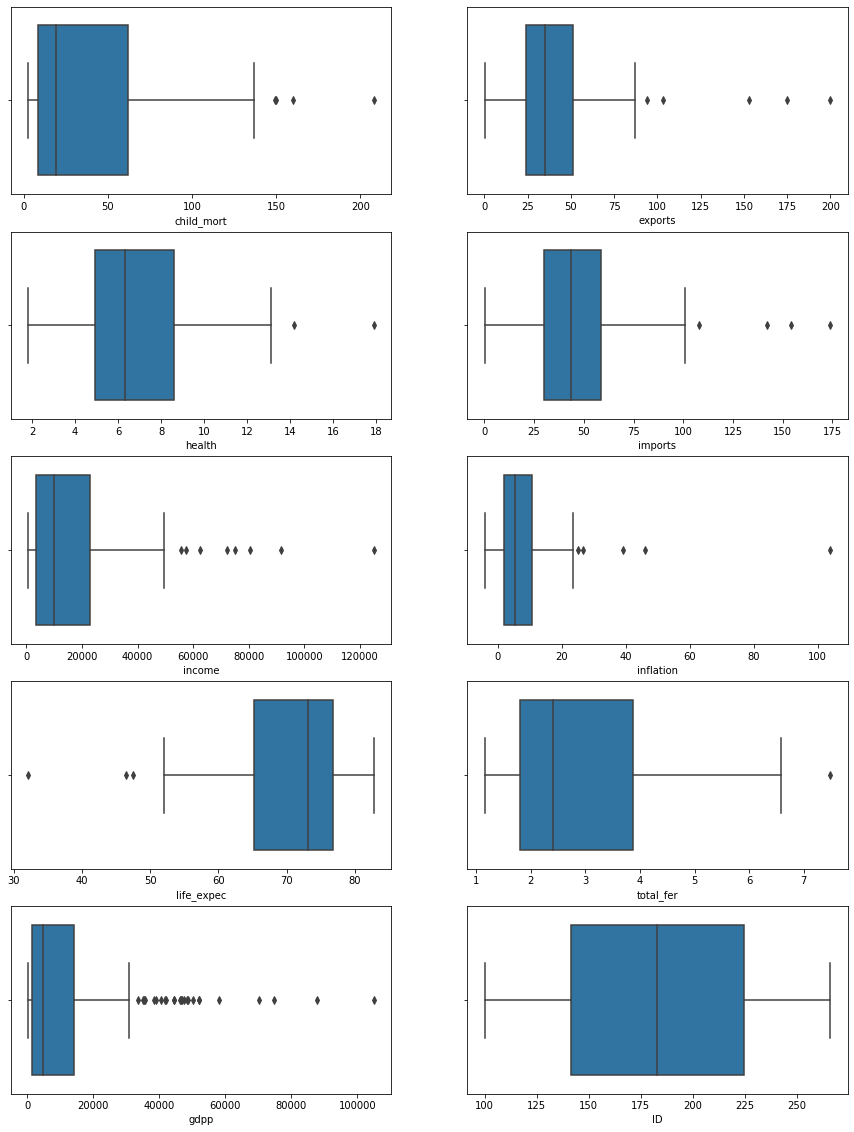

In [887]:
plt.figure(figsize=(15,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data=countrydata)


In [888]:
#outliertreatment
countrydata.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

In [889]:
outlier_treatment = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
for i in outlier_treatment:
    q1 = countrydata[i].quantile(0.01)
    q4 = countrydata[i].quantile(0.95)
    countrydata= countrydata[(countrydata[i]>=q1) & (countrydata[i]<=q4)]

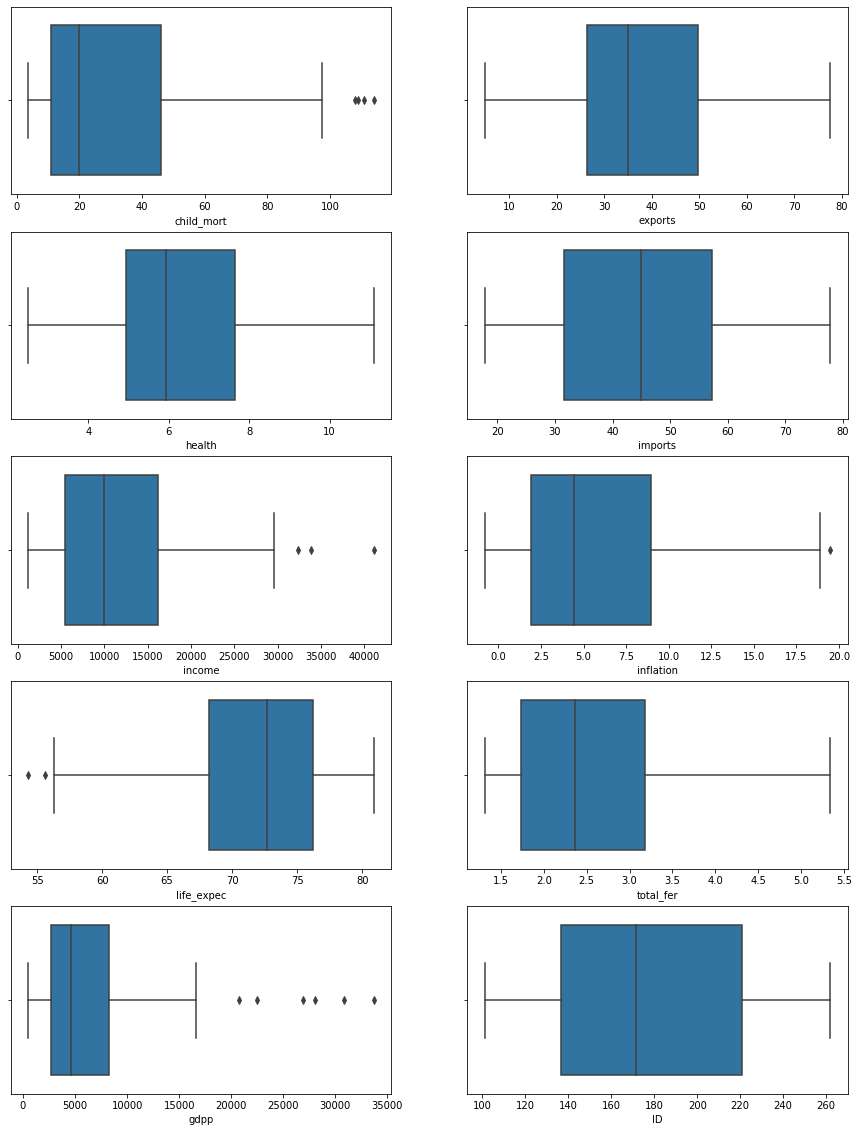

In [890]:
plt.figure(figsize=(15,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data=countrydata)

In [891]:
countrydata.shape

(90, 10)

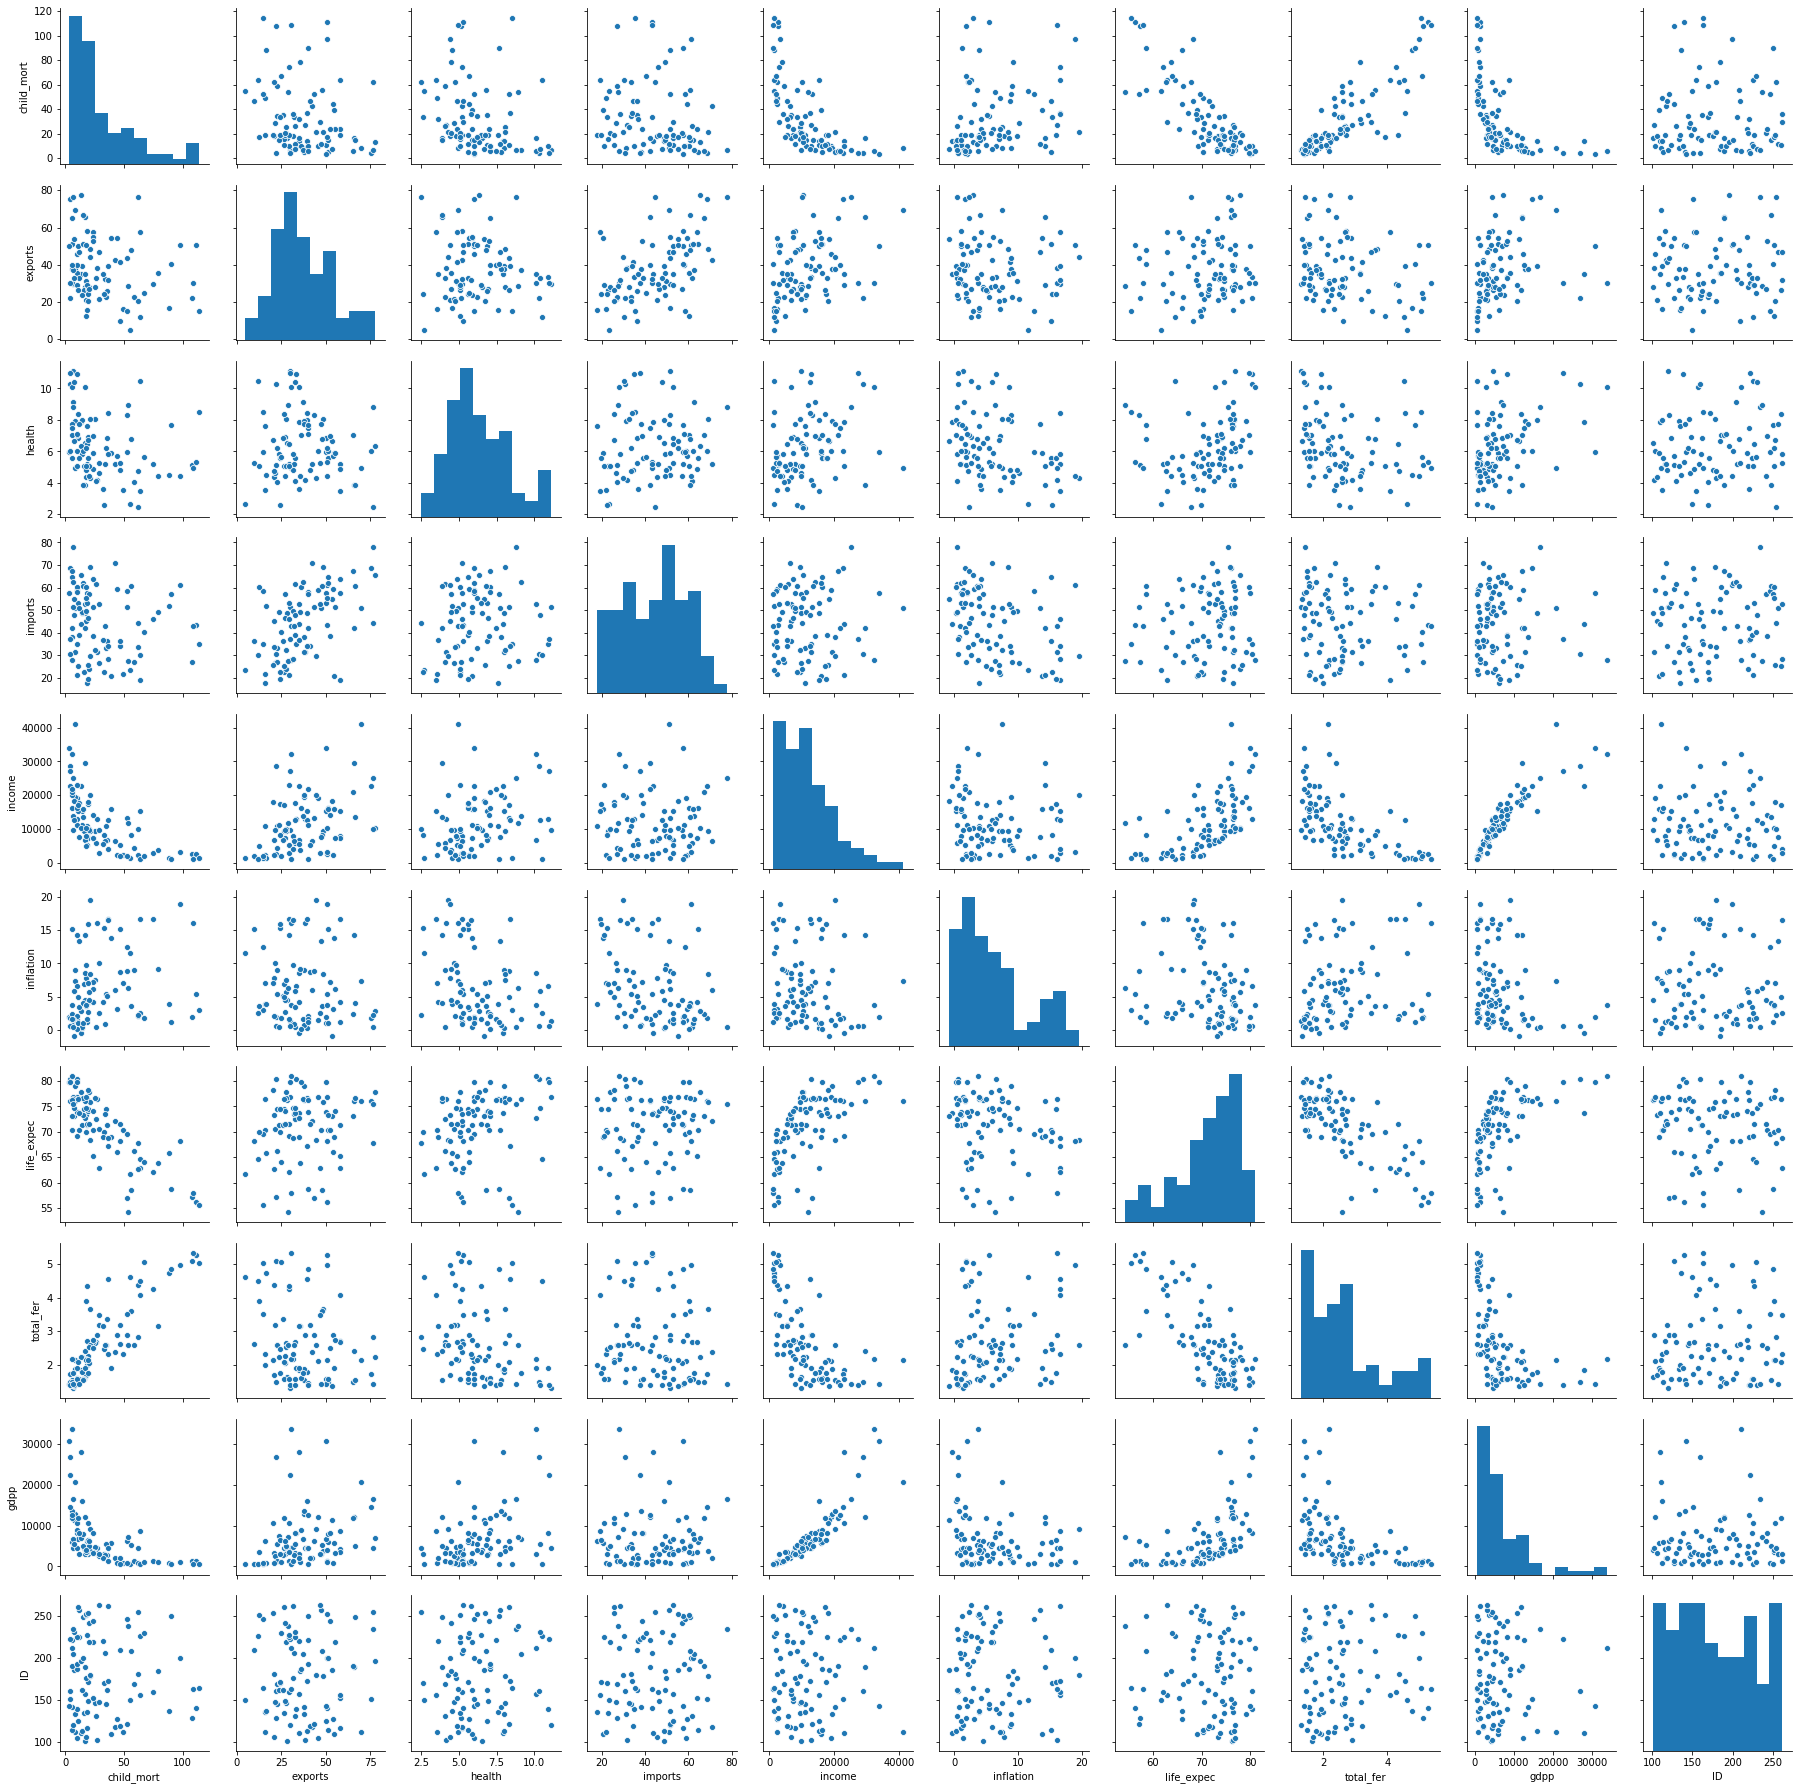

In [892]:
sns.pairplot(countrydata)

In [893]:
 #Hopkins
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [894]:
hopkins(countrydata)

0.8642679854676252

###K-Mean Clustering

In [895]:
# silhoutte analysis

sil = []
for k in range(2,10):
    #initialise kmeans
    kmeans = KMeans(n_clusters  = k).fit(countrydata)
    #silhoutte score
    sil.append([k,silhouette_score(countrydata, kmeans.labels_)])

In [896]:
sil


[[2, 0.6079847014994917],
 [3, 0.5370389396843103],
 [4, 0.5239713084977977],
 [5, 0.5115606341473494],
 [6, 0.47493164063398274],
 [7, 0.49210848879223673],
 [8, 0.49096197925184565],
 [9, 0.4863353994370681]]

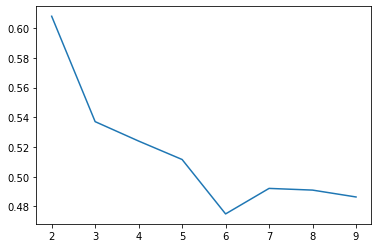

In [897]:
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])


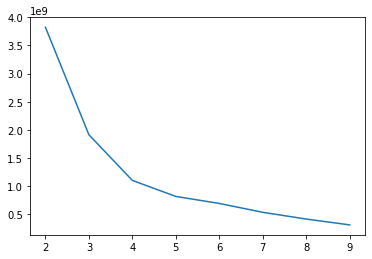

In [898]:
ssd = []
for k in range(2,10):
    k_mean = KMeans(n_clusters = k).fit(countrydata)
    ssd.append([k, k_mean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [899]:
# final model with K-means=
kmean3 = KMeans(n_clusters = 4, random_state=50)
kmean3.fit(countrydata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [900]:
countrydata.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106
9,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,109


In [901]:
cdat_km_scale = pd.concat([countrydata.reset_index().drop('index', axis = 1), pd.Series(kmean3.labels_).reset_index().drop('index', axis = 1)], axis  =1)


In [902]:
cdat_km_scale.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,0
0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1
1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1
2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,2
3,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106,3
4,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,109,1


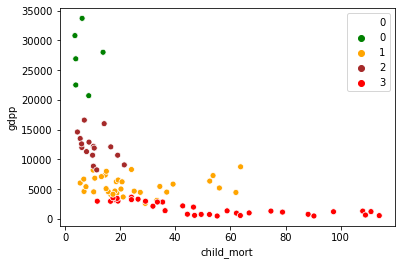

In [903]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', data = cdat_km_scale, hue= 0, palette = ['green', 'orange', 'brown','red'])
plt.savefig("cmvsgdppsctter")

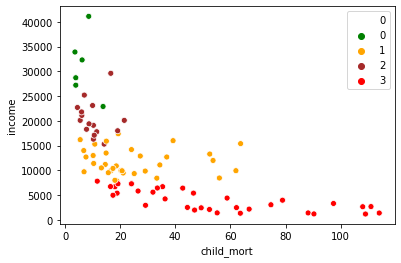

In [904]:
sns.scatterplot(x = 'child_mort', y = 'income', data = cdat_km_scale, hue= 0, palette = ['green', 'orange', 'brown','red'])
plt.savefig("gdppsctter")

In [905]:
dat_km = pd.concat([countrydata.reset_index().drop('index', axis = 1), pd.Series(kmean3.labels_).reset_index().drop('index', axis = 1)], axis  =1)

In [906]:
countrydata.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

In [910]:
dat_km.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','ID','Cluster_id']
dat_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_id
0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1
1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1
2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,2
3,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106,3
4,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,109,1


In [ ]:
dat_km.Cluster_id.value_counts()

In [ ]:
kpi=dat_km[['child_mort','income','gdpp',"ID",'Cluster_id']]


In [ ]:
plt.figure(figsize = (15,10))
features = ['child_mort', 'income','gdpp']
for i in enumerate(features):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(x = 'Cluster_id', y = i[1], data = kpi)
    plt.savefig("boxplot")

In [ ]:
data_test = pd.read_csv('country-data.csv')
data_test['ID'] = 100+data_test.index
data_test.head()

In [ ]:
test = pd.merge( data_test,kpi[['ID', 'Cluster_id']], on = 'ID')
test.head()

In [ ]:
test[test['Cluster_id'] ==0]['child_mort'].plot(kind = 'bar')

In [ ]:
test[test['Cluster_id'] ==1]['child_mort'].plot(kind = 'bar')

In [ ]:
test[test['Cluster_id'] ==2]['child_mort'].plot(kind = 'bar')

In [ ]:
test[test['Cluster_id'] ==0]['gdpp'].plot(kind = 'bar')

In [ ]:
test[test['Cluster_id'] ==1]['gdpp'].plot(kind='bar')

In [ ]:
test[test['Cluster_id'] ==2]['gdpp'].plot(kind = 'bar')

In [ ]:
test.sort_values("gdpp", axis = 0, ascending = True,inplace = True)

In [ ]:
test.set_index("country",drop=True,inplace=True)


In [ ]:
test[test['Cluster_id'] ==1]['gdpp'].plot(kind='bar')


In [ ]:
test[test['Cluster_id'] ==0]['gdpp'].plot(kind='bar')

In [ ]:
test[test['Cluster_id'] ==2]['gdpp'].plot(kind='bar')

In [ ]:
test[test['Cluster_id'] ==0]['child_mort'].plot(kind='bar')


In [ ]:
test[test['Cluster_id'] ==1]['child_mort'].plot(kind='bar')


In [ ]:
test[test['Cluster_id'] ==2]['child_mort'].plot(kind='bar')


In [913]:
test2=test[test['Cluster_id']==0]
test2.sort_values("gdpp", axis = 0, ascending = True,inplace = True)
test2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_id
country,,,,,,,,,,,
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,111,0
Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,222,0
Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,160,0
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,110,0
Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,142,0
New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33700,211,0


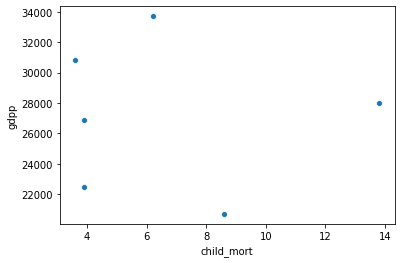

In [912]:
sns.scatterplot(x=test2['child_mort'], y=test2['gdpp'])
plt.savefig("scat")

In [911]:
test3=test[test['Cluster_id']==1]
test3.sort_values("gdpp", axis = 0, ascending = True,inplace = True)
test3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_id
country,,,,,,,,,,,
Egypt,29.1,21.3,4.66,26.6,9860,10.10,70.5,3.19,2600,147,1
Indonesia,33.3,24.3,2.61,22.4,8430,15.30,69.9,2.48,3110,170,1
Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3680,178,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1
Tunisia,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140,252,1
Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,116,1
Turkmenistan,62.0,76.3,2.50,44.5,9940,2.31,67.9,2.83,4440,254,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1
Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500,172,1


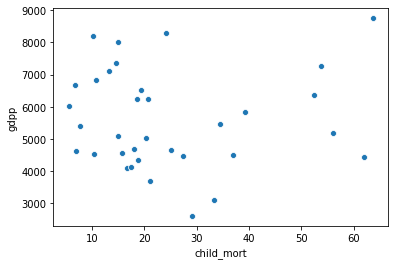

In [908]:
sns.scatterplot(x=test3['child_mort'], y=test3['gdpp'])
plt.savefig("abc")


In [909]:
test4=test[test['Cluster_id']==2]
test4.sort_values("gdpp", axis = 0, ascending = True,inplace = True)
test4


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_id
country,,,,,,,,,,,
Romania,11.5,32.6,5.58,38.8,17800,3.530,73.7,1.59,8230,224,2
Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,186,2
Kazakhstan,21.5,44.2,4.29,29.9,20100,19.500,68.4,2.60,9070,179,2
Turkey,19.1,20.4,6.74,25.5,18000,7.010,78.2,2.15,10700,253,2
Russia,10.0,29.2,5.08,21.1,23100,14.200,69.2,1.57,10700,225,2
Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300,185,2
Uruguay,10.6,26.3,8.35,25.4,17100,4.910,76.4,2.08,11900,260,2
Lithuania,6.1,65.3,7.04,67.2,21100,2.380,73.2,1.50,12000,190,2
Libya,16.6,65.6,3.88,42.1,29600,14.200,76.1,2.41,12100,189,2


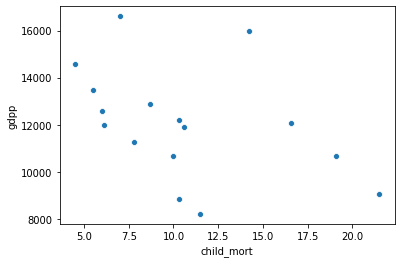

In [842]:
sns.scatterplot(x=test4['child_mort'], y=test4['gdpp'])
plt.savefig("ac")


## Hirerachial Clustering
the steps in hierarchical clustering are:

Calculate the NxN distance (similarity) matrix, which calculates the distance of each data point from the other

Each item is first assigned to its own cluster, i.e. N clusters are formed

The clusters which are closest to each other are merged to form a single cluster

The same step of computing the distance and merging the closest clusters is repeated till all the points become part of a single cluster

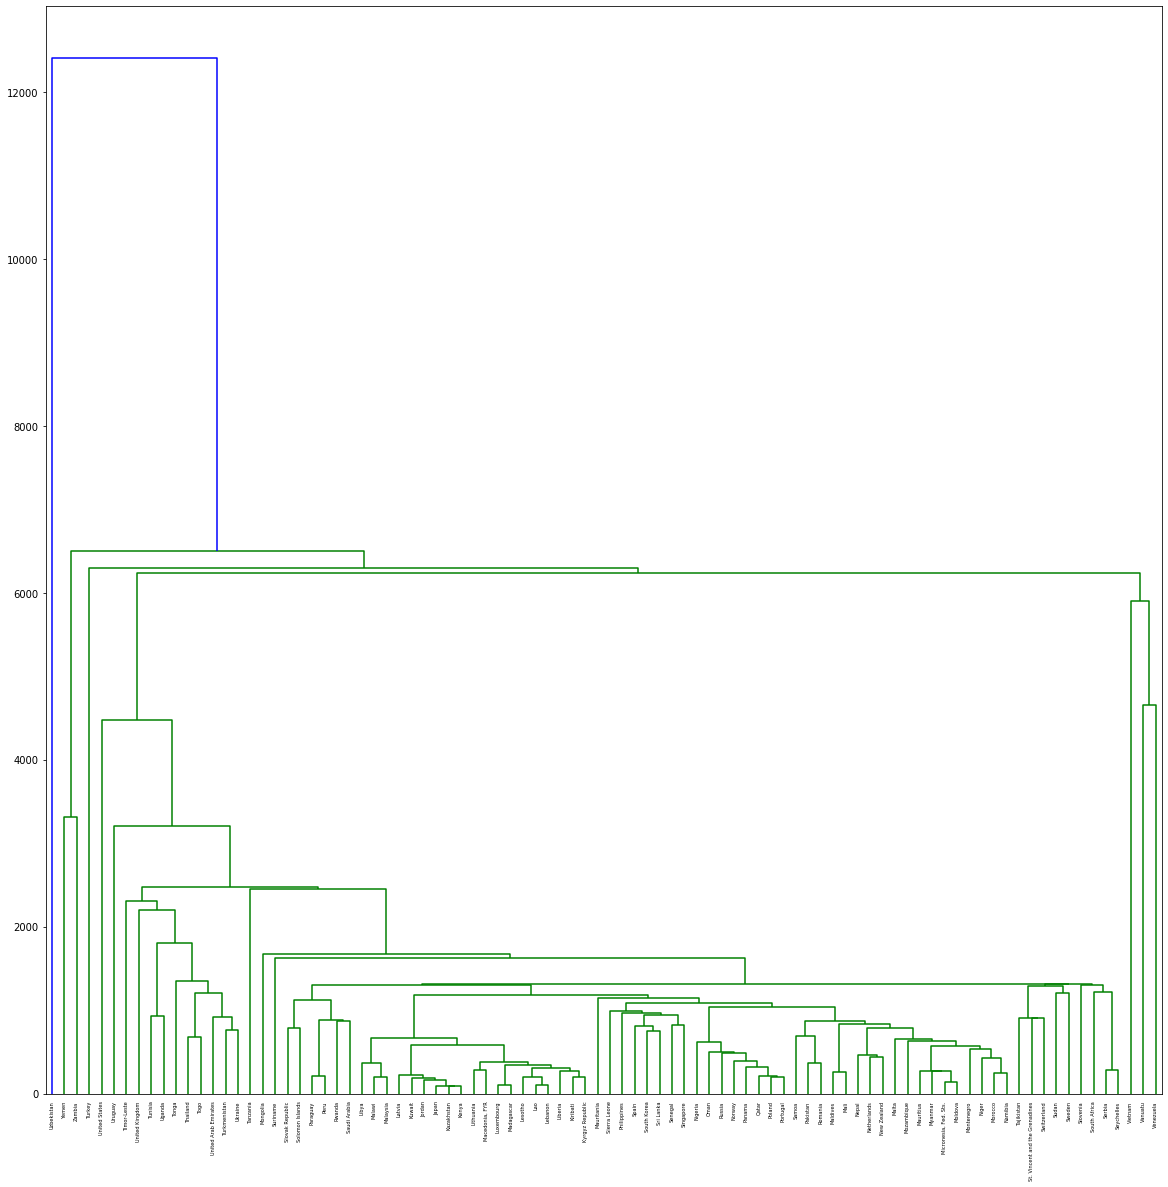

<Figure size 432x288 with 0 Axes>

In [924]:
#hirearchial clustering
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree



linked = linkage(test, 'single')

labelList = count2.country.values

plt.figure(figsize=(20,20))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
plt.savefig("den")

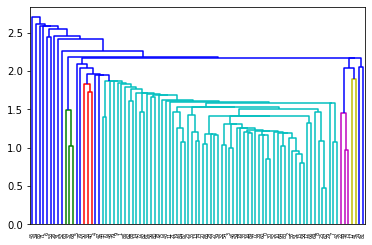

<Figure size 432x288 with 0 Axes>

In [844]:
#single linkage
mergings=linkage(x,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()
plt.savefig("dendrogram")

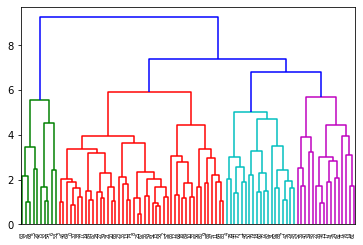

In [845]:
#completedendogram
mergings=linkage(x,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()



In [846]:
#cuttree
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0])

In [914]:
countrydata['cluster_labels']=cluster_labels

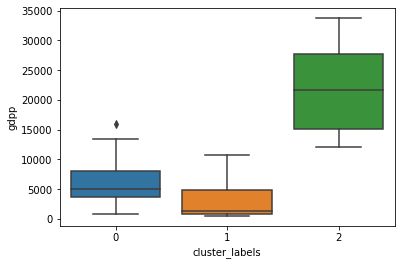

In [915]:
sns.boxplot(x='cluster_labels',y='gdpp',data=countrydata)
plt.savefig("boxplot1")

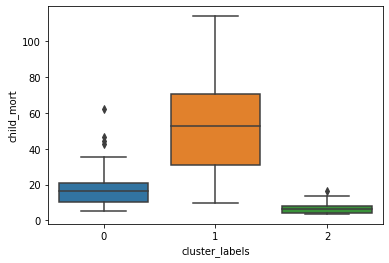

In [916]:
sns.boxplot(x='cluster_labels',y='child_mort',data=countrydata)
plt.savefig("boxplot2")

In [917]:
countrydata.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID', 'cluster_labels'],
      dtype='object')

In [918]:
tcd2=countrydata[countrydata['cluster_labels']==0]
tcd2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,101,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,104,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,106,0
13,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,113,0
14,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,114,0
16,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,116,0
18,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,118,0
19,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,119,0
20,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,120,0
24,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,124,0


In [919]:
tcd2=countrydata[countrydata['cluster_labels']==1]
tcd2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,102,1
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,109,1
12,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,112,1
21,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,121,1
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,128,1
30,26.5,32.70,4.09,61.8,5830,0.505,72.5,2.67,3310,130,1
36,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,136,1
40,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,140,1
47,29.1,21.30,4.66,26.6,9860,10.100,70.5,3.19,2600,147,1
50,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,150,1
